# Library Initialization

In [9]:
import yfinance as yf
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
#import xgboost as xgb
#from sklearn.model_selection import train_test_split
#import empyrical
#from pypfopt.efficient_frontier import EfficientFrontier
#from sklearn import linear_model
#import Machine_Learning_Portfolio
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
#from xgboost import XGBRegressor

# Data Imports

In [11]:
days = 30
tickers = ["GE", "PFE","SBUX", "GME", "DAL", "AAPL", "GOOGL" ]
stocks = pd.concat([yf.Ticker(i).history(period = "max")["Close"].pct_change().dropna().rename(i) for i in tickers], axis=1, join = 'inner')
df = stocks.resample(str(days)+"d").mean()

# window generator (from tensorflow)

In [12]:
t = stocks[:"2019"]
window_size = 3
windows = timeseries_dataset_from_array(t.iloc[:-window_size], t.shift(-window_size).dropna(), window_size,batch_size = len(t)-1)
X, Y = [i for i in windows][0]
X_train = np.vstack([X[:,:,i].numpy() for i in range(len(tickers))])
Y_train = np.hstack([Y[:,i].numpy() for i in range(len(tickers))])

In [13]:
t = stocks["2020":]
window_size = 3
windows = timeseries_dataset_from_array(t.iloc[:-window_size], t.shift(-window_size).dropna(), window_size,batch_size = len(t)-1)
X, Y = [i for i in windows][0]
X_test = np.vstack([X[:,:,i].numpy() for i in range(len(tickers))])
Y_test = np.hstack([Y[:,i].numpy() for i in range(len(tickers))])


In [19]:
X_test

array([[ 0.06899642,  0.00335293,  0.01420223],
       [ 0.00335293,  0.01420223, -0.00741357],
       [ 0.01420223, -0.00741357, -0.0091286 ],
       ...,
       [ 0.01429394, -0.01640783, -0.00442742],
       [-0.01640783, -0.00442742, -0.01547109],
       [-0.00442742, -0.01547109,  0.00344193]])

In [26]:
windows = 2
#Means

#X1 = stocks.resample(str(days)+"d").mean()
#X2 = stocks.resample(str(days)+"d").mean().shift(1).dropna()
#Y = stocks.resample(str(days)+"d").mean().shift(2).dropna()
#X2 = X2.iloc[:-1]
#X1 = X1.iloc[:-2]
#X1 = np.vstack((X1[col].values.reshape(-1,1) for col in X1.columns))
#X2 = np.vstack((X2[col].values.reshape(-1,1) for col in X2.columns))
#X = np.hstack((X1, X2))
#Y = np.vstack((Y[col].values.reshape(-1,1) for col in Y.columns)).flatten()
#Covar
#X


# Ridge CV Regression Model

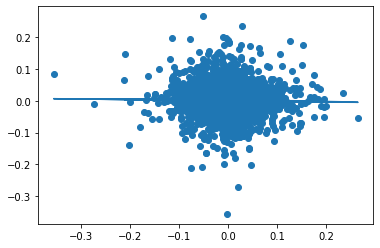

In [107]:
model = linear_model.LinearRegression()
model.fit(X_test, Y_test)
y_pred = model.predict(X_test)
plt.plot(X_test[:,0], y_pred)
plt.scatter(X_test[:,0], Y_test)


In [101]:
X_test.shape-
Y_test[]

(7, 3183)

In [122]:

X.nim

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'flatten'

# Random Forest Model

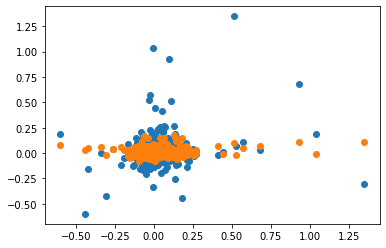

In [131]:
model = XGBRegressor()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
plt.scatter(X_test[:,0], Y_test)

plt.scatter(X_test[:,0], y_pred)

# Mean-Variance Optimization Function

In [134]:

X_sample = stocks.resample(window_size).mean()
dates = X_sample.index[1:-1]
portfolio = pd.DataFrame()

saved_weights = []
r0s = []
failed_dates = []
for i, day in enumerate(stocks.index[:-3]): 
    """sample_1 = stocks[day-pd.offsets.DateOffset(days = 2*days):day-pd.offsets.DateOffset(days=days-1)]
    sample_2 = stocks[day-pd.offsets.DateOffset(days = days):day-pd.offsets.DateOffset(days=1)]
    X1 = sample_1.mean().values.reshape(-1,1)
    X2 = sample_2.mean().values.reshape(-1,1)
    X_data = np.hstack((X1, X2))"""
    
    
    t = stocks.iloc[i:i+window_size]
    window_size = 3
    windows = timeseries_dataset_from_array(t, window_size,batch_size = len(t)-1)
    X, Y = [i for i in windows][0]
    X_daata = np.vstack([X[:,:,i].numpy() for i in range(len(tickers))])
    
    
    #sample = stocks[day+pd.offsets.DateOffset(days = 7):day+pd.offsets.DateOffset(days=13)]
    #Using Previous Data:
    #mean = sample.mean(axis=0)
    mean = pd.Series(model.predict(X_data), index = sample_1.columns)
    covar = sample_2.cov()
    
    try:
        weights_vector = [EfficientFrontier(mean,covar).max_sharpe()[ticker] for ticker in stocks.columns]
    except:
        weights_vector = [EfficientFrontier(mean,covar).max_quadratic_utility()[ticker] for ticker in stocks.columns]
        failed_dates.append(day)
        
    portfolio = pd.concat([portfolio,stocks[day:day+pd.offsets.DateOffset(days=days-1)].dot(weights_vector)])
    saved_weights.append(weights_vector)
portfolio = portfolio.sort_index()
saved_weights = pd.DataFrame(saved_weights, index = dates[2:], columns = tickers)

ValueError: Invalid frequency: 3

In [12]:
len(failed_dates)
len(dates[2:])


167

In [9]:
portfolio_weights = empyrical.sharpe_ratio(portfolio)
equal_weights = empyrical.sharpe_ratio(stocks.mean(axis=1))
print((portfolio_weights, equal_weights))

(array([0.74112914]), 0.8215045450546973)


<AxesSubplot:xlabel='Date'>

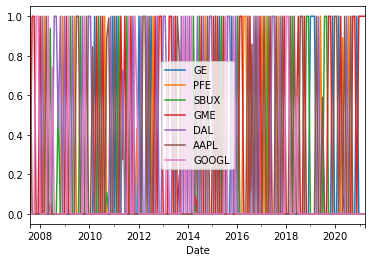

In [10]:
saved_weights.plot()
